In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
#check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
#Replace missing values 
df.fillna(df.mean() ,inplace=True)

In [5]:
#check for duplicate rows
df = df.drop_duplicates()

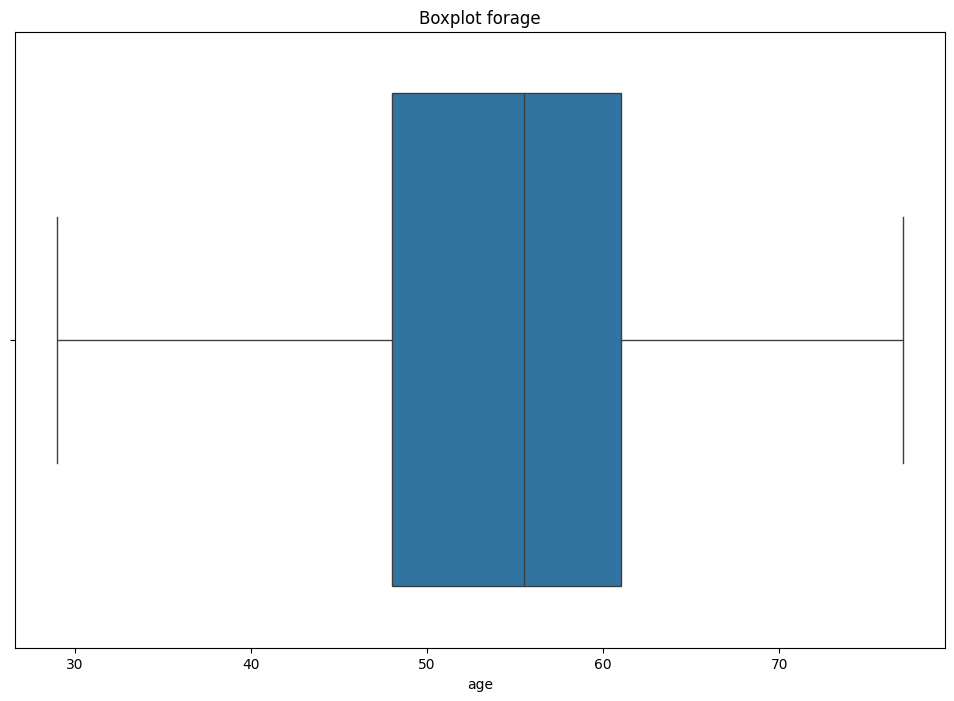

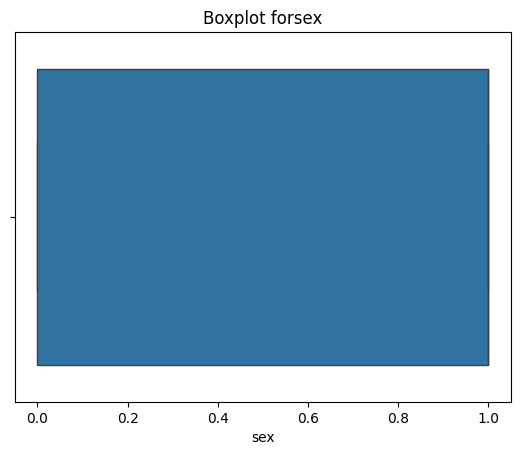

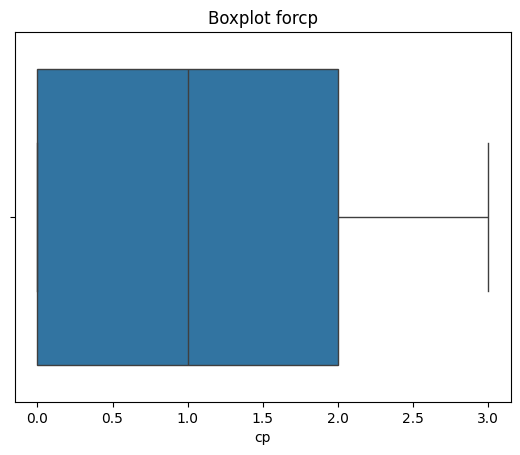

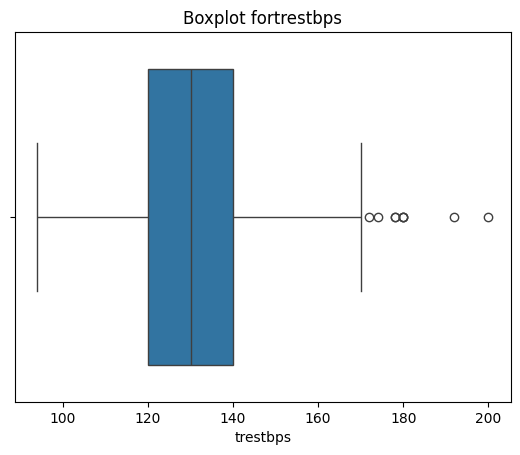

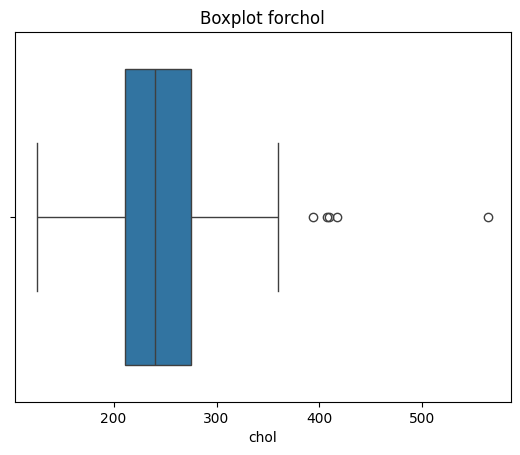

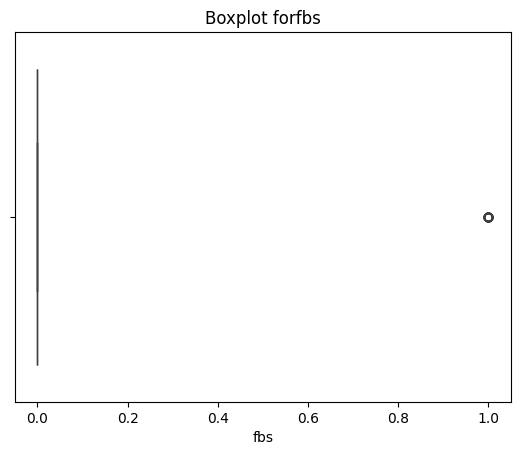

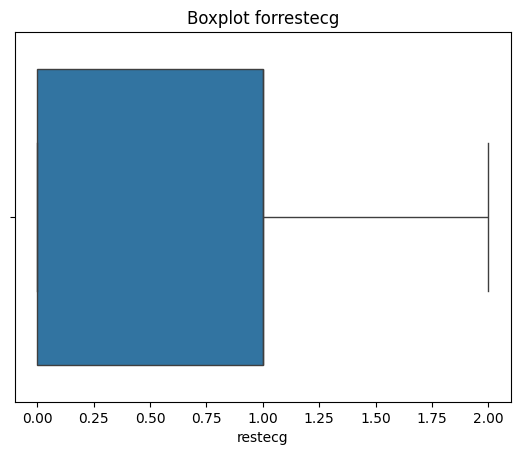

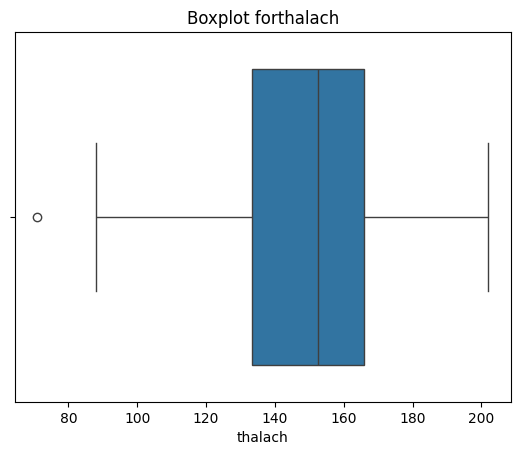

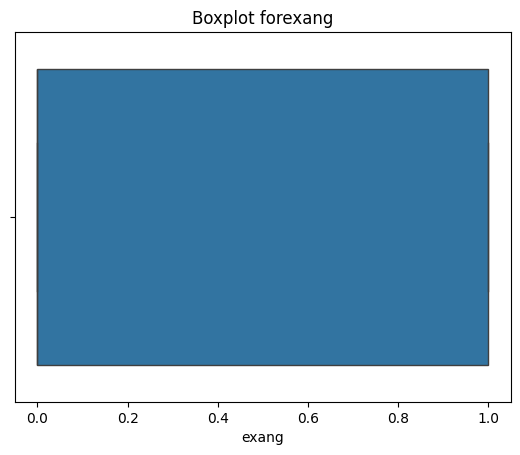

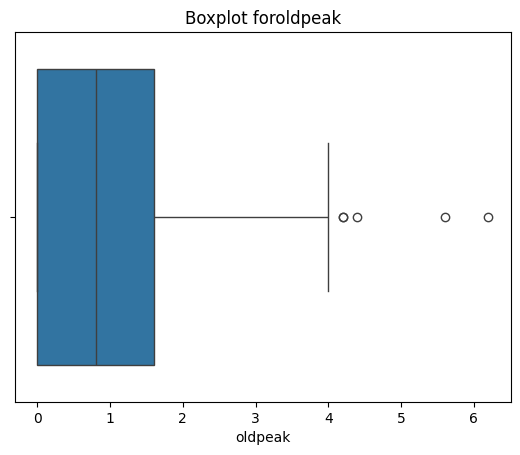

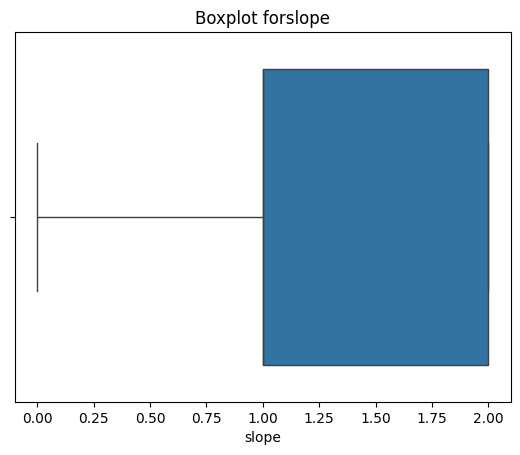

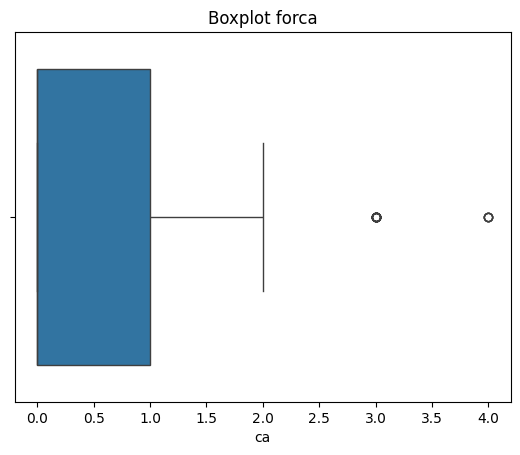

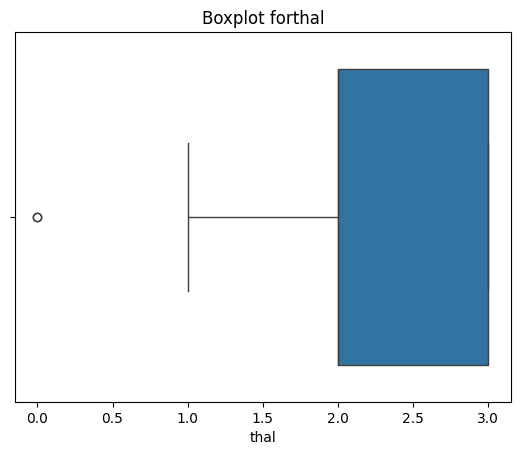

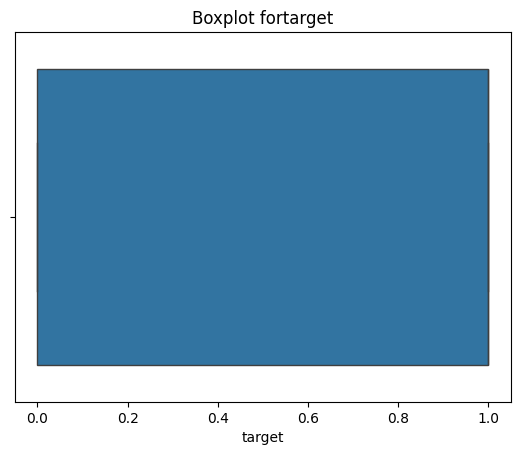

In [6]:
plt.figure(figsize=(12,8))
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for{column}')
    plt.show()

In [7]:
#Handling outliers
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 -q1
lower_bound = q1 - 1.5 *iqr
upper_bound = q3 + 1.5 *iqr
df['age'] = np.clip(df['age'],lower_bound,upper_bound)


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


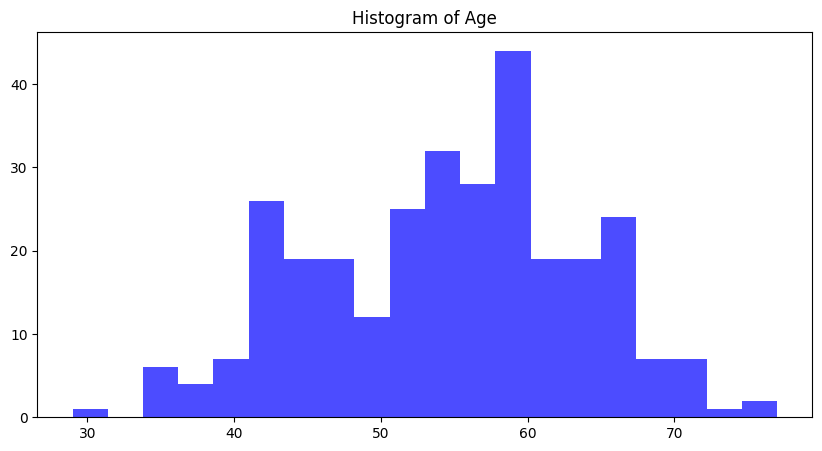

In [10]:
#Histograms for attributes 
plt.figure(figsize=(10,5))
plt.hist(df['age'], bins=20 ,color='blue' ,alpha=0.7)
plt.title('Histogram of Age')
plt.show()

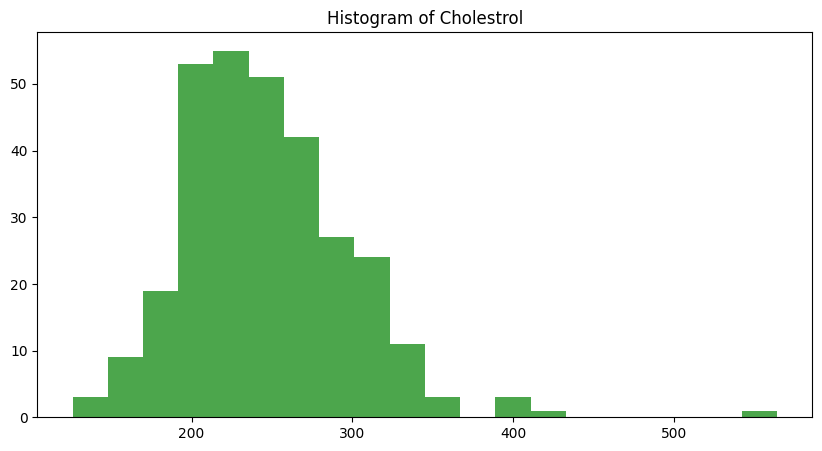

In [11]:
#Histograms for attributes 
plt.figure(figsize=(10,5))
plt.hist(df['chol'], bins=20 ,color='green' ,alpha=0.7)
plt.title('Histogram of Cholestrol')
plt.show()

In [12]:
#Finding datatype
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [13]:
#Finding zeros
(df == 0).sum()

age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         257
restecg     147
thalach       0
exang       203
oldpeak      98
slope        21
ca          175
thal          2
target      138
dtype: int64

In [14]:
#Find mean age of patients 
mean_age = df['age'].mean()
print(f'Mean Age of Patients : {mean_age}')

Mean Age of Patients : 54.420529801324506


In [15]:
#Find shape of data
print(f'The shape of the dataset is :{df.shape}')

The shape of the dataset is :(302, 14)


In [16]:
#Find mode age of patients 
mode_age = df['age'].mode()[0]
print(f'Mode Age of Patients : {mode_age}')

Mode Age of Patients : 58


In [17]:
#Find median age of patients 
median_age = df['age'].median()
print(f'Median Age of Patients : {median_age}')

Median Age of Patients : 55.5


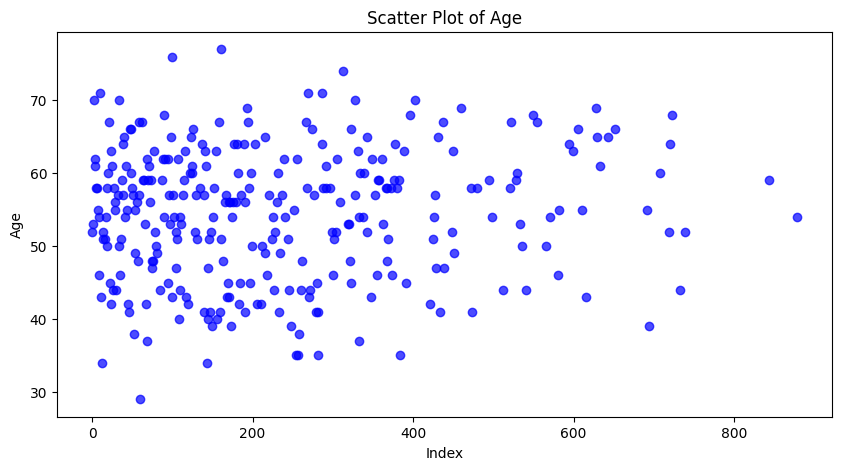

In [18]:
#Scatter plot for ages
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['age'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Age')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

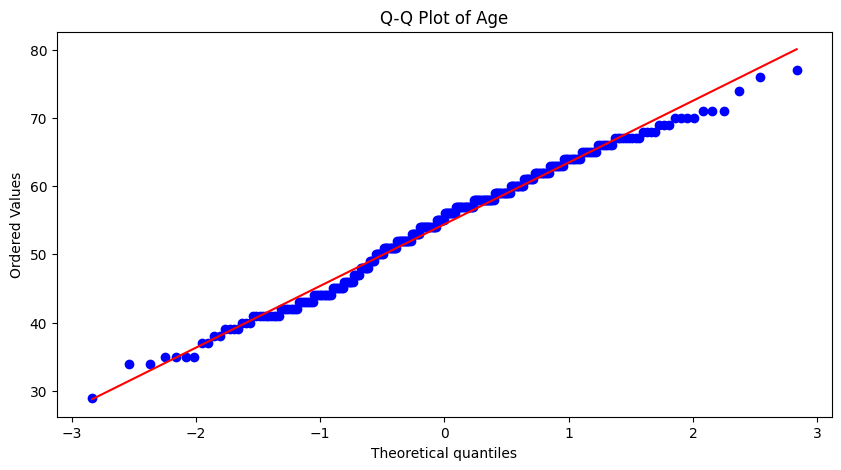

In [19]:
# Q-Q Plot for ages
plt.figure(figsize=(10, 5))
stats.probplot(df['age'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Age")
plt.show()

In [20]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


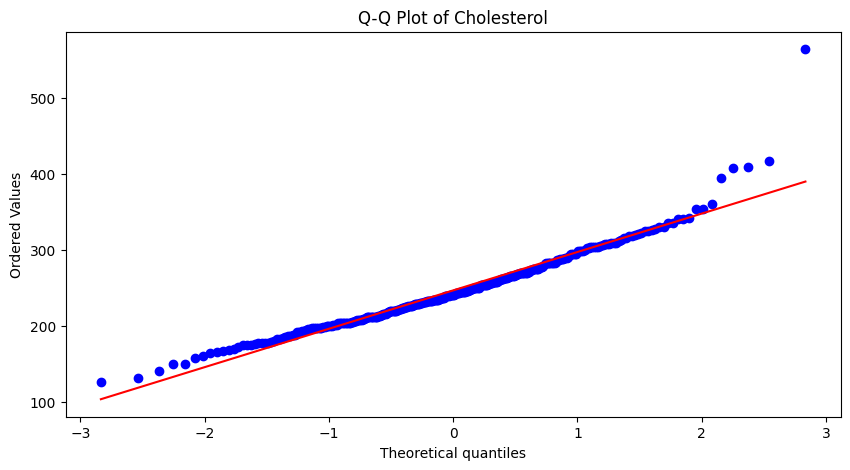

In [22]:
#Quantile plot for Chloestrol
plt.figure(figsize=(10, 5))
stats.probplot(df['chol'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Cholesterol")
plt.show()

/tmp/ipykernel_15941/649250300.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['chol'], color='green', shade=True)


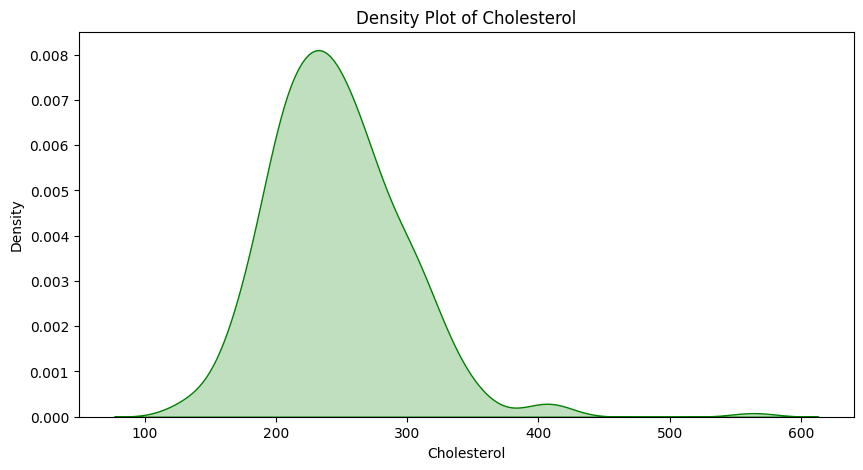

In [23]:
#Continous Plot for Chloestrol
plt.figure(figsize=(10, 5))
sns.kdeplot(df['chol'], color='green', shade=True)
plt.title("Density Plot of Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Density")
plt.show()

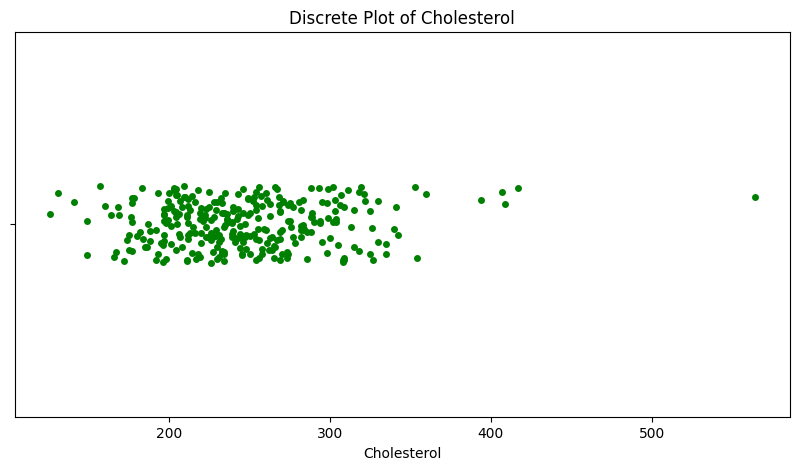

In [25]:
#Discrete plot for Chlestrol 
plt.figure(figsize=(10, 5))
sns.stripplot(x=df['chol'], color='green', jitter=True)
plt.title("Discrete Plot of Cholesterol")
plt.xlabel("Cholesterol")
plt.show()